In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"/Users/arslanahmed/Downloads/ML_PROJECT/Code/tripadvisor_hotel_reviews.csv")

# CLEANING THE DATA

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df[ "Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [5]:
df_neg = df.loc[df["Rating"] <= 2]
df_neg = df_neg.reset_index(drop=True)

In [6]:
df_five = df.loc[df[ "Rating"] >= 3]
df_five = df_five.reset_index (drop = True)

In [7]:
df_pos = df_five.loc[:len(df_neg)]

In [8]:
len(df_pos)

3215

In [9]:
df_all=pd.concat([df_neg, df_pos], axis=0)
df_all=df_all.reset_index(drop= True)
len(df_all)

6429

In [10]:
df_all.head()

,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,"poor value stayed monaco seattle july, nice ho...",2
2,horrible customer service hotel stay february ...,1
3,disappointed say anticipating stay hotel monac...,2
4,great location need internally upgrade advanta...,2


# CREATE A SENTIMENTS COLUMN

In [11]:
df_all["Sentiment"] = np.where(df_all["Rating"] >= 3, "Positive", "Negative" )

In [12]:
df_all = df_all.sample(frac = 1)
df_all.reset_index(drop = True)

,Review,Rating,Sentiment
0,"disappointing stayed hotel zoo long weekend, b...",2,Negative
1,better reviews posted make read reviews websit...,4,Positive
2,ok hotel good location good large rooms excell...,2,Negative
3,maison st. charles quality inn looked lot plac...,4,Positive
4,oasis civilization sea humanity hotel matches ...,5,Positive
...,...,...,...
6424,"poor quality, stay absolutely, terrible sound ...",1,Negative
6425,worn impersonal just stayed nights marina mand...,2,Negative
6426,disappointed stayed 3 days starting august 13....,1,Negative
6427,"disaster, reservation arrived hotel airport to...",1,Negative


In [13]:
df_all.head(10)

,Review,Rating,Sentiment
1700,"disappointing stayed hotel zoo long weekend, b...",2,Negative
5850,better reviews posted make read reviews websit...,4,Positive
953,ok hotel good location good large rooms excell...,2,Negative
5068,maison st. charles quality inn looked lot plac...,4,Positive
4270,oasis civilization sea humanity hotel matches ...,5,Positive
4851,best location value properties waikiki head ho...,4,Positive
5094,great value lasts 3 nights downtown sf block u...,4,Positive
3631,dissapointed magnolia maybe expectations high ...,3,Positive
2724,dark dingy hotel great location chinatown room...,2,Negative
2265,avoid hotel husband travel 5 times yr world sa...,1,Negative


# SPLITTING THE DATA

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_all.Review, df_all.Sentiment)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

# CLASSIFICATION

In [16]:
from sklearn import svm
clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(x_train_vec, y_train)

SVC(kernel='linear')

# TESTING THE RESULTS

In [17]:
clf_svm.score(x_test_vec, y_test)

0.8855721393034826

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, clf_svm.predict(x_test_vec), average = None)

array([0.88627936, 0.88485607])

# TESTING THE USER INPUT

In [32]:
rev = ["very bad experience"]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

# CONFUSION MATRIX

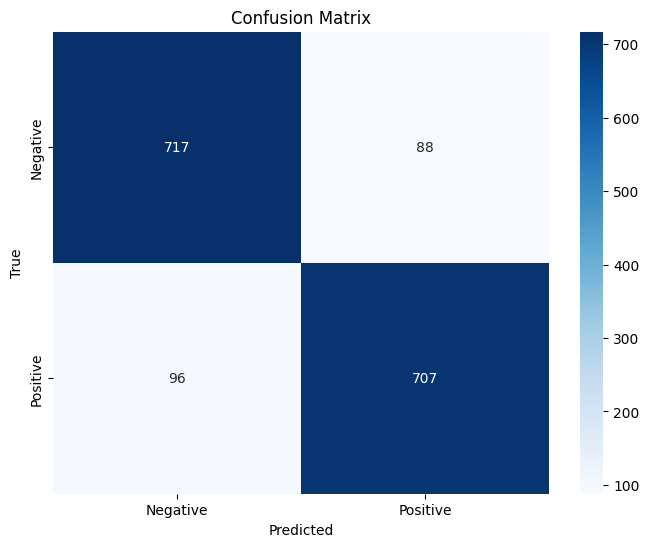

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = clf_svm.predict(x_test_vec)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Bar plot for the distribution of ratings

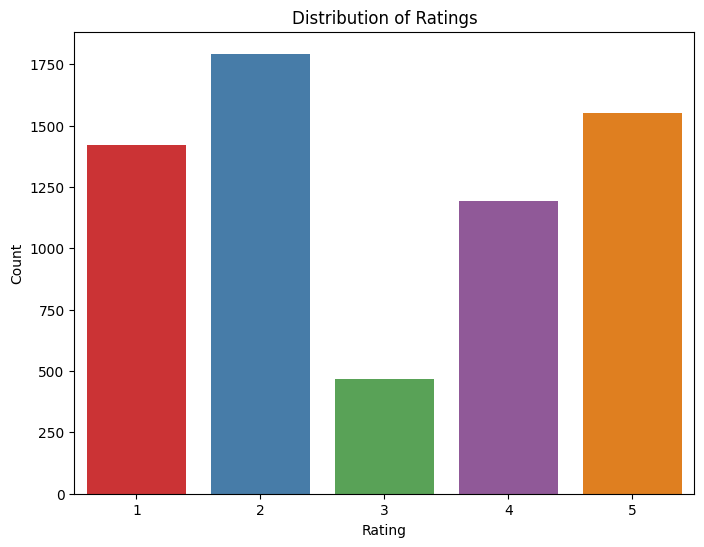

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a count plot using seaborn, assign 'Rating' to both x and hue
sns.countplot(x='Rating', hue='Rating', data=df_all, palette='Set1', legend=False)

# Add title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


# Bar plot for the distribution of sentiments

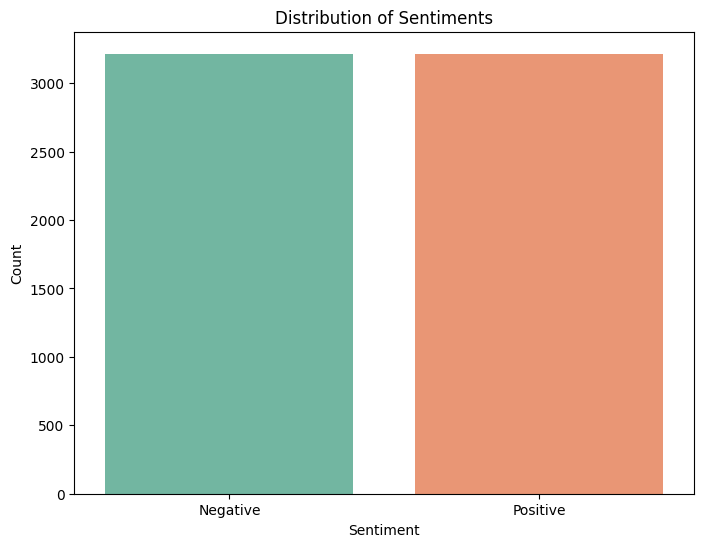

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a count plot using seaborn, assign 'Sentiment' to both x and hue
sns.countplot(x='Sentiment', hue='Sentiment', data=df_all, palette='Set2', legend=False)

# Add title and labels
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()
